# Introduction

A challenge which the banking industry faces on a day-to-day basis is to assess credit risks of applicants while looking at their loan applications. Applicants who are likely to repay loan are termed as good credit risks. Whereas applicants who are not likely to repay their loan amounts are termed as bad credit risks. Therefore, it is vital for banking business to minimize risk by carefully identifying "bad credit risks" so that the liabilities of the applicants are not transfered to banks. 

Artificial intelligence (AI) techniques can drive banking operations to correctly identify bad credit risks. In this notebook, we will use a German credit dataset to build AI models and evaluate their potential to help banking industry. 

# Explore the German credit data (Statlog)

This notebook analyzes credit dataset of Germany (Statlog) to identify good or bad credit risk. The dataset is downloaded from UCI Machine learning repository (https://archive-beta.ics.uci.edu/ml/datasets/144).

In this notebook, we use the German dataset that includes 20 attributes and 1 target. 

1.   **Checking account status:** Status of checking account coded as a categorical variable

           A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM / salary assignments for at least 1 year
           A14 : no checking account

2.   **Duration in month:** Coded as a numerical variable

3. **Credit history:** Coded as a categorical variable
      
          A30 : no credits taken/all credits paid back duly
          A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
          A33 : delay in paying off in the past
	      A34 : critical account/other credits existing (not at this bank)

4. **Purpose for credit:** Coded as a categorical variable

          A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

5. **Credit amount:** Credit amount requested which is coded as a numerical variable

6. **Savings account/bonds:** Health of the savings account coded as a categorical variable

          A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
          A65 :   unknown/ no savings account

7. **Present employment since:** Number of years working in the present employemnt coded as a categorical variable

          A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

8. **Installment rate in percentage of disposable income:** Rate of installment coded as a numerical variable

9. **Personal status and sex:** Background of an applicant coded as a categorical variable

        A91 : male   : divorced/separated
	    A92 : female : divorced/separated/married
        A93 : male   : single
	    A94 : male   : married/widowed
	    A95 : female : single

10. **Other debtors / guarantors:** Availability of other guarantors coded as a categorical variable

        A101 : none
	    A102 : co-applicant
	    A103 : guarantor

11. **Present residence since:** A numerical variable captures the number of years an applicant is residing at his current residence

12. **Property:** Property owned by an applicant

        A121 : real estate
	    A122 : if not A121 : building society savings agreement/life insurance
        A123 : if not A121/A122 : car or other, not in attribute 6
	    A124 : unknown / no property

13. **Age in years:** Coded as a numerical variable

14. **Other installment plans:** Details of other installment plans coded as a categorical variable

        A141 : bank
	    A142 : stores
	    A143 : none

15. **Housing:** Housing type coded as a categorical variable

        A151 : rent
	    A152 : own
	    A153 : for free

16. **Number of existing credits at this bank:** any other credits at this bank coded as a numerical variable

17. **Job:** Type of job being done by an applicant coded as a categorical variable

        A171 : unemployed/ unskilled  - non-resident
	    A172 : unskilled - resident
	    A173 : skilled employee / official
	    A174 : management/ self-employed/ highly qualified employee/ officer

18. **Number of people being liable to provide maintenance for:** Coded as a numeral

19. **Telephone:** Telephonic details coded as a categorical variable

        A191 : none
	    A192 : yes, registered under the customers name

20. **Foreign worker:** Working status of an applicant coded as a categorical variable

        A201 : yes
	    A202 : no

21. **Target:** Binary where 1 refers to *good credit* and 2 refers to *bad credit* risk.









### **Load dataset**

Let's start by loading the german credit data as a Pandas DataFrame and viewing the first few rows.

In [1]:
import pandas as pd
df = pd.read_csv('german_credit_data.csv', sep = ' ', header= None)
#rename columns
df.columns = ['ChkAccountStatus', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmt','SavingsAcc',
              'Employment','InstallmentRate','PersonalStatus','Guarantors','Residence','Property',
              'Age', 'InstallmentPlans','Housing','ExistingCredits','Job','PeopleforLiability',
              'Telephone','ForeignWorker','Target']

Visualize first 10 rows of the dataset

In [2]:
df.head(10)

,ChkAccountStatus,Duration,CreditHistory,Purpose,CreditAmt,SavingsAcc,Employment,InstallmentRate,PersonalStatus,Guarantors,...,Property,Age,InstallmentPlans,Housing,ExistingCredits,Job,PeopleforLiability,Telephone,ForeignWorker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


Now that we know what the features and labels in the data represent, let's explore the dataset. First, let's see if there are any missing (null) values.

In [3]:
df.isnull().sum()

ChkAccountStatus      0
Duration              0
CreditHistory         0
Purpose               0
CreditAmt             0
SavingsAcc            0
Employment            0
InstallmentRate       0
PersonalStatus        0
Guarantors            0
Residence             0
Property              0
Age                   0
InstallmentPlans      0
Housing               0
ExistingCredits       0
Job                   0
PeopleforLiability    0
Telephone             0
ForeignWorker         0
Target                0
dtype: int64

The dataset is complete as there are no missing values!

## Class distribution

In [4]:
df['Target'] = df['Target'].map({1: 1, 2: 0})

In [5]:
df['Target'].value_counts()

1    700
0    300
Name: Target, dtype: int64

Text(0.5, 1.0, 'Class distribution')

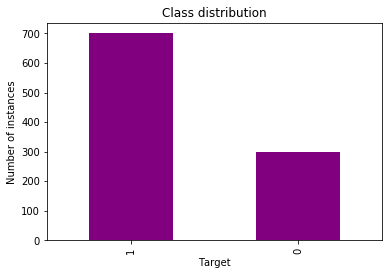

In [6]:
import matplotlib.pyplot as plt
df['Target'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Target')
plt.ylabel('Number of instances')
plt.title('Class distribution')

In [7]:
#Identify class imbalance ratio
imb_ratio = len(df[df['Target'] == 1]) / len(df[df['Target'] == 0])
print('Imbalance ratio is:',"%.2f" % imb_ratio)

Imbalance ratio is: 2.33


## Feature engineering

Let's separate the features from the labels - we'll call the features X and the label y. X includes both numerical and categorical features.

In [8]:
# Separate features and labels

numeric_features = df.describe().columns.tolist()

#Drop Target from numerical features

numeric_features.pop(-1)

print('Numerical features:',numeric_features)

#categorical columns 
categorical_features = list(set(df.columns.tolist()).difference(df.describe().columns.tolist()))

print('Categorical features:',categorical_features)

df[categorical_features] = df[categorical_features].astype('category')

#feature names
features = numeric_features + categorical_features

print('Total number of features or attributes:', len(features))

Numerical features: ['Duration', 'CreditAmt', 'InstallmentRate', 'Residence', 'Age', 'ExistingCredits', 'PeopleforLiability']
Categorical features: ['Telephone', 'InstallmentPlans', 'Job', 'ChkAccountStatus', 'SavingsAcc', 'PersonalStatus', 'ForeignWorker', 'Purpose', 'Guarantors', 'CreditHistory', 'Housing', 'Employment', 'Property']
Total number of features or attributes: 20


### Numerical features

Now let's compare the numerical feature distributions for each label value.

In [9]:
import numpy as np
int(np.ceil(4/3))

2

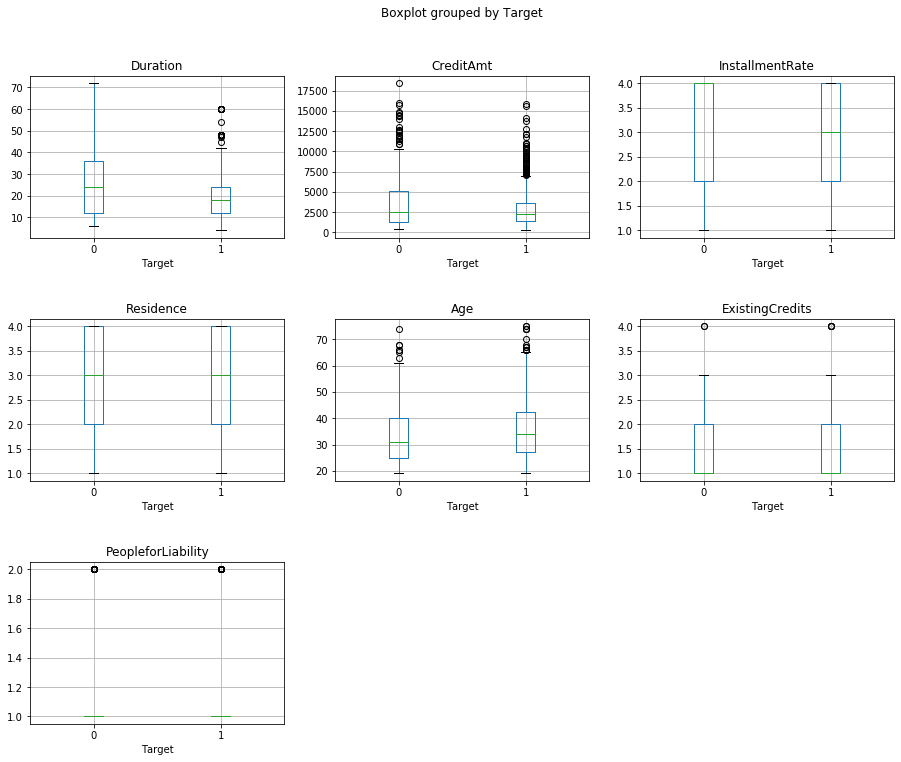

In [10]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
figure, axes = plt.subplots(3, 3, figsize=(15,12))
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
figure.delaxes(axes[-1, -1])
figure.delaxes(axes[-1, -2])
i=0

for col in numeric_features:
    a = int(np.floor(i/3))
    b = i%3
#     print(a,b)
    df.boxplot(column=col, by='Target', ax=axes[a][b])
    i=i+1
    plt.title(col)
plt.show()

By looking at the box plots, we obsereve that "Duration", "Credit Amount", "Age", "Installment rate" seem to be strong predictors!

In [11]:
numeric_features = ['Duration', 'Age', 'CreditAmt']
features = numeric_features + categorical_features
print('Updated number of features:', len(features))

Updated number of features: 16


### Categorical features

Let's analyze how categorical variables affect the good credit rate (i.e., good credit instances divided by the total instances)

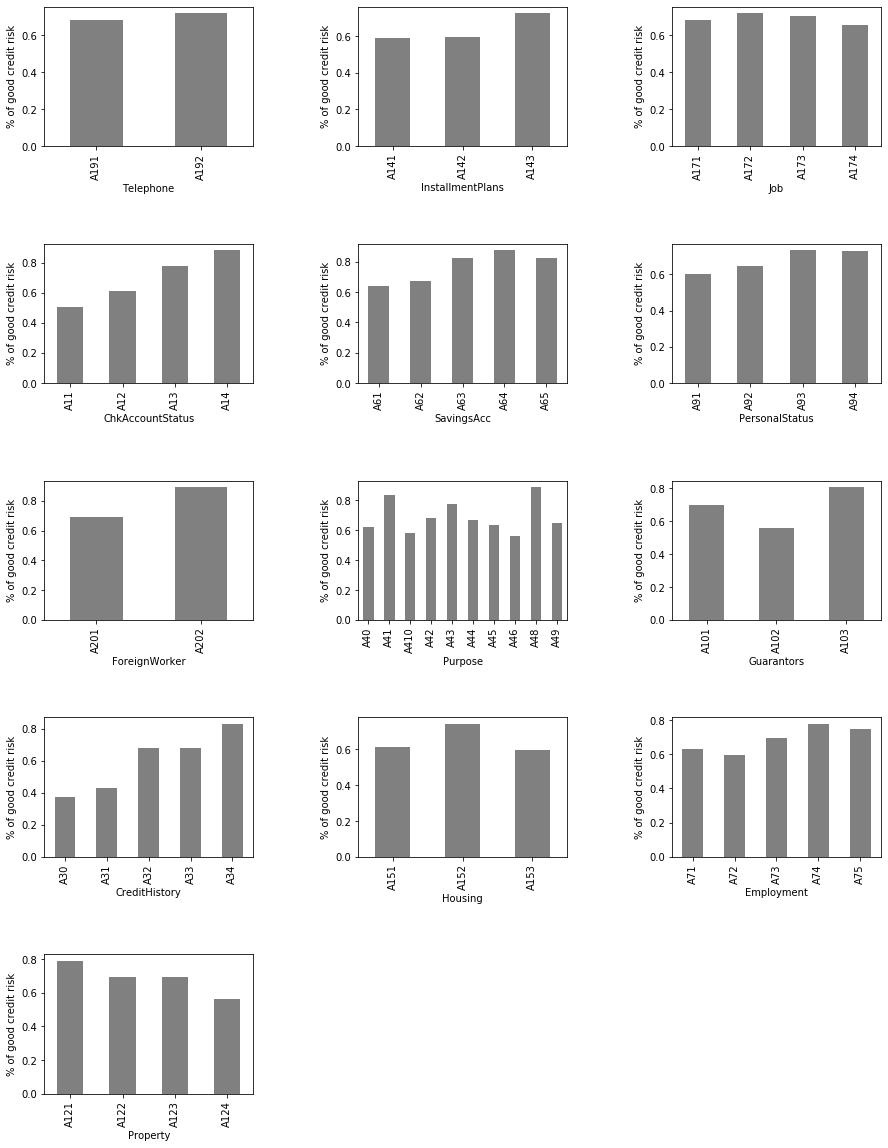

In [12]:
%matplotlib inline
figure, axes = plt.subplots(5, 3, figsize=(15,20))
plt.subplots_adjust(hspace = 0.7, wspace=0.5)
figure.delaxes(axes[-1, -1])
figure.delaxes(axes[-1, -2])
i=0

for col in categorical_features:
    a = int(np.floor(i/3))
    b = i%3
    df.pivot_table("Target",index=col).plot(kind='bar', color='grey', legend=False, ax=axes[a,b])
    axes[a][b].set_ylabel('% of good credit risk')
    i = i+1
plt.show()

By looking at the box plots, we obsereve that "Telephone" and "Job" might not seem to be strong predictors!

In [13]:
categorical_features = ['ChkAccountStatus', 'PersonalStatus', 'InstallmentPlans', 
                        'Purpose', 'Employment', 'SavingsAcc', 'Guarantors', 'CreditHistory', 
                        'Property', 'ForeignWorker', 'Housing']
features = numeric_features + categorical_features
print('Updated number of features:', len(features))

Updated number of features: 14


## Cross-validation

Now we use cross-validatin technique to compare the performance of several classifiers. In this notebook, we have cosnidered the following 8 classifiers.

1. Logistic regression (LR),
2. Random forest (RF),
3. Weighted Logistic regression (LR-W),
4. Weighted random forest (RF-W),
5. Balanced random forest classifier (BRF),
6. Easy Ensemble Classifier (EEC),
7. RUSBoost Classifier (RBC), and
8. Balanced Bagging Classifier (BBC)

Apart from first two, rests of the classifiers can handle class imbalance.


First, we define features and labels before classifiers are trained.

In [14]:
from sklearn.model_selection import train_test_split

# Separate features and labels
label = 'Target'
X, y = df[features], df[label]

We use a pipeline to perform the cross-validation. Our pipeline has several components.

1. One-hot encoding for categorical features
2. Standard scaler for numerical features
3. 10-fold validation

We look at balanced accuray and precision to evalaute the performance of classifiers. The balanced accuracy computes an arithmetic mean of class-specific accuracies. Whereas, the precision focuses on how good the classifier is in prediciting good credit risks.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from imblearn.metrics import geometric_mean_score
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate

column_trans = ColumnTransformer(
    [('category', OneHotEncoder(), categorical_features),
     ('numerical', StandardScaler(), numeric_features)])

scoring = {'accuracy','balanced_accuracy','precision'}

models = []

models.append(('LR', LogisticRegression(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('LR_W', LogisticRegression(random_state=42,class_weight="balanced")))
models.append(('RF_W', RandomForestClassifier(random_state=42, class_weight = "balanced")))
models.append(('BRF', BalancedRandomForestClassifier(random_state=42)))
models.append(('EEC', EasyEnsembleClassifier(base_estimator=AdaBoostClassifier(random_state=42))))
models.append(('RBC', RUSBoostClassifier(random_state=42)))
models.append(('BBC', BalancedBaggingClassifier(random_state=42)))

results_acc = []
results_bal_acc = []
results_prec = []

names = []
print('Model', 'Accuracy', 'BalAcc', 'Precision')
for name, model in models:
    rf = Pipeline(steps=[('preprocessor', column_trans),
                      ('classifier', model)])
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_validate(rf, X, y, cv=kfold, scoring=scoring)
    results_bal_acc.append(cv_results['test_balanced_accuracy'])
    results_acc.append(cv_results['test_accuracy'])
    results_prec.append(cv_results['test_precision'])
    names.append(name)
    msg = "%s %f %f %f " % (name, cv_results['test_accuracy'].mean(), cv_results['test_balanced_accuracy'].mean(), cv_results['test_precision'].mean())
    print(msg)

Model Accuracy BalAcc Precision
LR 0.754000 0.672857 0.794589 
RF 0.760000 0.669524 0.790521 
LR_W 0.735000 0.738333 0.870983 
RF_W 0.765000 0.667381 0.786937 
BRF 0.693000 0.702619 0.852706 
EEC 0.706000 0.715714 0.861701 
RBC 0.721000 0.717857 0.855539 
BBC 0.682000 0.692857 0.847639 


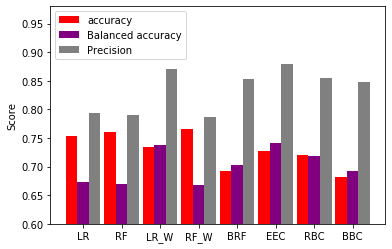

In [34]:
x = np.arange(len(names))
y1 = np.mean(results_acc, axis=1)
y2 = np.mean(results_bal_acc, axis=1)
y3 = np.mean(results_prec, axis=1)
width = 0.30
  
# plot data in grouped manner of bar type
plt.bar(x-0.3, y1, width, color='red', label='accuracy')
plt.bar(x, y2, width, color='purple', label='Balanced accuracy')
plt.bar(x+0.3, y3, width, color='grey', label='Precision')
plt.xticks([r for r in range(len(names))],names)
plt.ylabel('Score')
plt.legend(loc='upper left');
plt.ylim([0.6,0.98]);

# Conclusions

This dataset suffers from class imbalance. Therfore, we observe that accuracy can be a misleading metric. Therefore, we use balanced accuracy in this case that tries to incoporate the class-specific accuracies in a single formula. 

Precision is considered here to evalaute the quality of models so that *bad credit risks* are not transfered as *good ones*. Higher the pre

Our results suggest that weighted logistic regression achieves a balanced accuracy of 73.83% and a precision of 87.07%. A comparable performance is achieved by the Easy Ensemble Classifier which shows a balanced accuracy of 73.35% and a precision of 87.38%.